In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download Models

In [ ]:
downloaded = drive.CreateFile({'id':"1_oH1cPI-omK8962v2wgRhSSRvj47HVS0"})
downloaded.GetContentFile('task2_new_rnn.h5')

In [ ]:
downloaded = drive.CreateFile({'id':"1HrumFzuaUTwx0YPfbHlLbZTHcjROBaej"})
downloaded.GetContentFile('task2_tl_rnn.h5')

In [ ]:
!mkdir -p task2_new_cnn
!mkdir -p task2_new_cnn/assets/
!mkdir -p task2_new_cnn/variables/

In [ ]:
downloaded = drive.CreateFile({'id':"1uopd4dEK13kQcMkRyySAu-drPPBcX_W_"})
downloaded.GetContentFile('task2_new_cnn/saved_model.pb')

downloaded = drive.CreateFile({'id':"1NvN6UZMzN4NTu06x7KLshijPpl_HYAZW"})
downloaded.GetContentFile('task2_new_cnn/variables/variables.index')
downloaded = drive.CreateFile({'id':"1XDaobmMgNH40lsRwAPc6S8UGX-YI2BDW"})
downloaded.GetContentFile('task2_new_cnn/variables/variables.data-00000-of-00001')

In [ ]:
!mkdir -p task2_tl_cnn
!mkdir -p task2_tl_cnn/assets/
!mkdir -p task2_tl_cnn/variables/

In [ ]:
downloaded = drive.CreateFile({'id':"1eDDe5aYH2nG4hO469-xHC6p1jlecPYNV"})
downloaded.GetContentFile('task2_tl_cnn/saved_model.pb')

downloaded = drive.CreateFile({'id':"1hNbxZOqoECw52sh-9QwlgfluR7dxOpci"})
downloaded.GetContentFile('task2_tl_cnn/variables/variables.index')
downloaded = drive.CreateFile({'id':"1rQY3tRaXRxxqUf993CptOLmYafhogC95"})
downloaded.GetContentFile('task2_tl_cnn/variables/variables.data-00000-of-00001')

# Load Models

In [ ]:
import tensorflow as tf

In [ ]:
models = [None, None, None, None]

In [ ]:
models[0] = tf.keras.models.load_model('task2_new_cnn')
models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 865, 500)          59774000  
_________________________________________________________________
conv1d (Conv1D)              (None, 864, 100)          100100    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 862, 100)          30100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
models[1] = tf.keras.models.load_model('task2_new_rnn.h5')
models[1].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 865, 500)          59774000  
_________________________________________________________________
global_average_pooling1d (Gl (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 59,876,210
Trainable params: 59,876,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
models[2] = tf.keras.models.load_model('task2_tl_cnn')
models[2].summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_input (InputLayer) [(None, 1200)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1200, 500)         59774000  
_________________________________________________________________
conv1d (Conv1D)              (None, 1199, 100)         100100    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1197, 100)         30100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0  

In [ ]:
models[3] = tf.keras.models.load_model('task2_tl_rnn.h5')
models[3].summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_input (InputLayer) [(None, 1200)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1200, 500)         59774000  
_________________________________________________________________
global_average_pooling1d (Gl (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               100200    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 59,876,210
Trainable params: 59,876,210
Non-trainable params: 0
_________________________________________________________________


# Test Data

In [ ]:
downloaded = drive.CreateFile({'id':"1FzgWIjW5bmrnGzJ01CXh8uSbBmsORBZP"})
downloaded.GetContentFile('top10.csv')

In [ ]:
import pandas as pd

data = pd.read_csv('top10.csv')
data.shape

(8564, 4)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=3e5b838a677f9e987736e04541955e2511d546ab441fad11d9d3d9778674a579
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=69c1a703d83087cddd4e2f982978bf75d2a7f0a7daaba08f9c53ecdbede56b27
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=819abeebd9ceb24d5b69e57cc2ffbf858008ab103ea2c67fe8f86bc529402953
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.2MB 7.4MB/s 


In [ ]:
import bert
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
#bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/1", trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
from tensorflow.keras.preprocessing import sequence

def getTokens(df):
  lyrics = df['Lyrics'].values
  X = [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(lyric)) for lyric in lyrics]
  return X

def padSeq(X, max):
  X = sequence.pad_sequences(X, maxlen=max, padding='post')
  return X

In [ ]:
X = getTokens(data)
X = padSeq(X, 865)
y = data['ArtistY'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test2  = padSeq(X_test,  1200)

# Evaluation

In [ ]:
loss = [0.0, 0.0, 0.0, 0.0]
accu = [0.0, 0.0, 0.0, 0.0]

In [ ]:
i = 0
for model in models:
  if (i < 2):
    loss[i], accu[i] = model.evaluate(X_test, y_test)
  else:
    loss[i], accu[i] = model.evaluate(X_test2, y_test)
  i = i + 1

54/54 [==============================] - 2s 30ms/step - loss: 0.8881 - accuracy: 0.7245


In [ ]:
res = pd.DataFrame(
    {'model'    : ['CNN', 'RNN', 'CNN_TL', 'RNN_TL'],
     'loss'     : loss,
     'accuracy' : accu})
res

,model,loss,accuracy
0,CNN,0.281301,0.930531
1,RNN,0.460477,0.876240
2,CNN_TL,1.756222,0.371862
3,RNN_TL,0.888122,0.724460


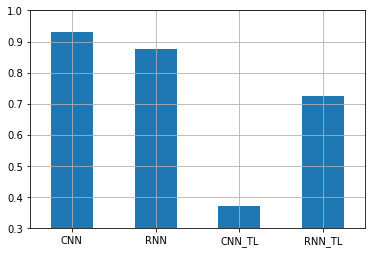

In [ ]:
res[['model', 'accuracy']].plot.bar(x='model', rot=0, legend=False, ylim=[0.3, 1.0], xlabel='', grid=True)

# Reports

In [ ]:
import numpy as np
#from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report

def get_report(model, x, y):
  y_probability = model.predict(x)
  y_predict = np.argmax(y_probability, axis=1)
  tnames = ['elvis presley', 'chris brown', 'elvis costello', 
            'ella fitzgerald', 'the rolling stones', 'bee gees', 'glee',
            'beyonce', 'bad religion', 'elton john']
  print(classification_report(y, y_predict, target_names=tnames))

In [ ]:
get_report(models[0], X_test, y_test)

                    precision    recall  f1-score   support

     elvis presley       0.89      0.92      0.91       250
       chris brown       0.96      0.99      0.98       244
    elvis costello       0.95      0.96      0.96       194
   ella fitzgerald       0.91      0.84      0.87       139
the rolling stones       0.96      0.91      0.93       155
          bee gees       0.92      0.91      0.92       143
              glee       0.84      0.87      0.86       150
           beyonce       0.96      0.96      0.96       141
      bad religion       0.97      0.99      0.98       143
        elton john       0.94      0.90      0.92       154

          accuracy                           0.93      1713
         macro avg       0.93      0.93      0.93      1713
      weighted avg       0.93      0.93      0.93      1713



In [ ]:
get_report(models[1], X_test, y_test)

                    precision    recall  f1-score   support

     elvis presley       0.76      0.92      0.83       250
       chris brown       0.96      0.97      0.96       244
    elvis costello       0.93      0.94      0.94       194
   ella fitzgerald       0.77      0.81      0.79       139
the rolling stones       0.85      0.89      0.87       155
          bee gees       0.88      0.74      0.81       143
              glee       0.80      0.71      0.75       150
           beyonce       0.92      0.93      0.92       141
      bad religion       0.97      0.97      0.97       143
        elton john       0.99      0.79      0.88       154

          accuracy                           0.88      1713
         macro avg       0.88      0.87      0.87      1713
      weighted avg       0.88      0.88      0.88      1713



In [ ]:
get_report(models[2], X_test2, y_test)

                    precision    recall  f1-score   support

     elvis presley       0.30      0.48      0.37       250
       chris brown       0.48      0.87      0.62       244
    elvis costello       0.34      0.27      0.30       194
   ella fitzgerald       0.45      0.52      0.48       139
the rolling stones       0.26      0.17      0.21       155
          bee gees       0.17      0.02      0.04       143
              glee       0.10      0.01      0.02       150
           beyonce       0.13      0.09      0.11       141
      bad religion       0.42      0.52      0.46       143
        elton john       0.41      0.40      0.40       154

          accuracy                           0.37      1713
         macro avg       0.31      0.34      0.30      1713
      weighted avg       0.32      0.37      0.32      1713



In [ ]:
get_report(models[3], X_test2, y_test)

                    precision    recall  f1-score   support

     elvis presley       0.62      0.70      0.66       250
       chris brown       0.81      0.93      0.86       244
    elvis costello       0.92      0.73      0.81       194
   ella fitzgerald       0.88      0.50      0.64       139
the rolling stones       0.76      0.73      0.75       155
          bee gees       0.42      0.86      0.56       143
              glee       0.50      0.34      0.40       150
           beyonce       0.95      0.68      0.79       141
      bad religion       0.87      0.97      0.91       143
        elton john       0.95      0.69      0.80       154

          accuracy                           0.72      1713
         macro avg       0.77      0.71      0.72      1713
      weighted avg       0.76      0.72      0.73      1713

